# Markowitz Portfolio Optimization Problem


In this notebook, we state and solve Markowitz Optimization Problem for the CAC 40.

# Set up : 


Consider an investment scenario with $n$ assets, where we seek to construct a portfolio with an initial value of $v$ at time $t = 0$. Let $a = (a_1, \dots, a_n)^T$  denote the number of units of each asset in the portfolio. The price of asset $i$ at time $t = 0$ and $t = 1$ are given by $p_{i,0}$ and $p_{i,1}$, respectively. We define the price vectors $p_0 = (p_{1,0}, \dots, p_{n,0})^T$ and $p_1 = (p_{1,1}, \dots, p_{n,1})^T$

The return $y_i$ of asset $i$ is a random variable defined as:

$$y_i = \frac{p_{i,1}}{p_{i,0}}$$

and the return vector is $Y = (y_1, \dots, y_n)^T$. The expected returns and covariance matrix are denoted by $\mu = \mathbb{E}[Y]$ and $\Omega = \mathbb{V}ar(Y)$, respectively.

Let $r$ be the risk-free rate, and $a_0$ be the amount of money invested at this rate. The portfolio's value at time $t = 0$ is:

$$V_0 = a_0 + a^T p_0$$

and at time $t = 1$, the portfolio's value is:

$$V_1 = a_0(1 + r) + a^T p_1 = a_0(1 + r) + \sum_{i=1}^{n} a_i p_{i,0} y_i = a_0(1 + r) + a^T \text{diag}(p_0) Y$$


We aim to maximize the expected value of the portfolio at time $t = 1$, $\mathbb{E}[V_1]$, subject to a constraint on the portfolio's variance $\mathbb{V}[V_1] = \sigma^2$. This leads to the optimization problem:

$$\max_{a_0, a} \mathbb{E}[V_1] = \max_{a_0, a} \left( a_0(1 + r) + a^T \text{diag}(p_0) \mu \right)$$

subject to the constraints:

$$a^T \text{diag}(p_0) \Omega \text{diag}(p_0) a = \sigma^2, \quad \text{and} \quad a_0 + a^T p_0 = v$$


To simplify the problem, we introduce the variable $w_a = \text{diag}(p_0) a$. The total initial portfolio value can then be expressed as $v = a_0 + w_a^T e$, where $e = (1, \dots, 1)^T$. The problem is equivalently reformulated as:

$$\max_{w_a} \left[ (v - w_a^T e)(1 + r) + w_a^T \mu \right]$$

subject to:

$$w_a^T \Omega w_a = \sigma^2$$


This formulation represents a classic Markowitz optimization problem, where the goal is to maximize the expected return of the portfolio for a given level of risk, characterized by the variance constraint.

Resolution : 

Denote $\tilde{\mu}=\mu-(1+r)e$. To solve Markowitz Portfolio Optimization Problem, we introduce the Lagrangian $\mathcal{L}(w_a, \lambda)$ : 

$$\mathcal{L} (w_a, \lambda) = w_a^T\tilde{\mu} - \frac{\lambda}{2}(w_a^T\Omega w_a - \sigma^2)$$

$$\mathcal{L} (w_a, \lambda) = \sum_{i=i}^N w_{a,i}\tilde{\mu_i} - \frac{\lambda}{2} \left( \sum_{i=1}^n w_{a,i}^2 \Omega_{i,i} + \sum_{i\not= j} w_{a,i}w_{a,j}\Omega_{i,j}-\sigma^2\right)$$

The first order conditions are the following : 

$$\forall i =1,...,N : \quad \frac{\partial\mathcal{L}}{\partial w_{a,i}} = \tilde{\mu_i} - \lambda \left( w_{a,i} \Omega_{i,i} + \sum_{i\not= j} w_{a,j}\Omega_{i,j} \right) = 0 $$

$$\frac{\partial\mathcal{L}}{\partial \lambda} = -\frac{1}{2} \left( w_a^T \Omega w_a- \sigma^2 \right) = 0 $$

Hence :

$$\tilde{\mu} = \lambda \Omega w_a \quad \text{and} \quad w_a^T\Omega w_a = \sigma^2$$

We can retrieve the parameters $a, a_0, \lambda$ with the following formulas : 

$$a = \frac{1}{\lambda} diag(p_0)^{-1} \Omega^{-1} \tilde{\mu}$$

$$a_0 = v - \frac{1}{\lambda} \tilde{\mu}^T \Omega^{-1}e$$

$$\lambda = \frac{1}{\sigma} \left( \tilde{\mu}^T \Omega^{-1} \tilde{\mu} \right)^{\frac{1}{2}}$$

`Remark` : $\lambda$ is proportionnal to $\frac{1}{\sigma}$ and acts as a risk aversion parameter. If $\sigma$ is small ($\lambda$ high) the proportion of wealth invested in risky assets is small.

# Estimation of $\mu$ and $\Omega$ : 

We use the empiricall estimators:

$$\widehat{\mu} = \frac{1}{M}\sum_{k=1}^M \mu_k$$

$$\widehat{\Omega_{i,j}} = \frac{1}{M}\sum_{k=1}^M (\mu_{k,i} - \widehat{\mu_{i}}) (\mu_{k,j} - \widehat{\mu_{j}})$$


# Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We use the prices of the 40 stocks in the CAC-40 from 2018 to 2024 : 

In [2]:
df = pd.read_csv('stocks.csv', sep=',')

In [3]:
df.head()

,date,AXA,Air Liquide,Airbus,Alstom,ArcelorMittal,BNP Paribas,Bouygues,Capgemini,Carrefour,...,Schneider Electric,Société Générale,Stellantis,Teleperformance,Thales,TotalEnergies,Unibail-Rodamco-Westfield,Veolia,Vinci,Worldline
0,2018-06-05,21.730,89.752,98.98,37.930,28.680,53.12,39.52,114.80,14.326,...,73.80,33.963,11.028,136.5,108.70,48.840,192.45,18.686,82.435,50.35
1,2018-06-06,21.630,90.661,100.00,37.801,29.485,53.69,39.82,114.70,14.103,...,73.94,33.885,11.186,136.4,108.40,49.233,192.20,18.512,82.474,50.55
2,2018-06-07,21.800,90.496,99.65,37.479,28.750,54.11,39.62,113.45,14.075,...,74.20,34.127,11.279,136.7,108.05,49.849,193.70,18.531,82.144,49.86
3,2018-06-08,21.800,90.496,100.90,37.746,28.045,53.70,39.18,113.20,13.908,...,73.60,33.908,11.219,137.3,110.35,49.587,192.10,18.406,81.853,50.25
4,2018-06-11,21.985,91.570,100.90,37.599,28.600,54.68,39.36,113.60,13.968,...,74.24,34.445,11.159,137.4,109.60,49.871,189.60,18.478,81.989,50.35


In [4]:
df.columns

Index(['date', 'AXA', 'Air Liquide', 'Airbus', 'Alstom', 'ArcelorMittal',
       'BNP Paribas', 'Bouygues', 'Capgemini', 'Carrefour', 'Crédit Agricole',
       'Danone', 'Dassault Systèmes', 'Edenred', 'Engie', 'EssilorLuxottica',
       'Eurofins Scientific', 'Hermès', 'Kering', 'L'Oréal', 'LVMH', 'Legrand',
       'Michelin', 'Orange', 'Pernod Ricard', 'Publicis', 'Renault',
       'STMicroelectronics', 'Safran', 'Saint-Gobain', 'Sanofi',
       'Schneider Electric', 'Société Générale', 'Stellantis',
       'Teleperformance', 'Thales', 'TotalEnergies',
       'Unibail-Rodamco-Westfield', 'Veolia', 'Vinci', 'Worldline'],
      dtype='object')

- BNP Paribas Asset Price

['2018-06-05' '2018-06-06' '2018-06-07' ... '2024-02-07' '2024-02-08'
 '2024-02-09']


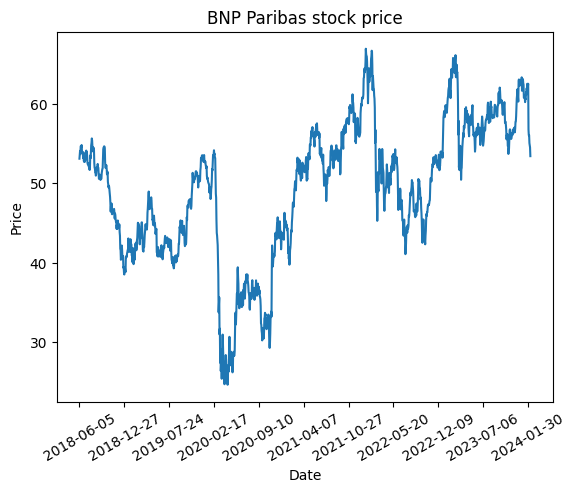

In [5]:
price = np.array(df['BNP Paribas'], dtype=float)
dates = np.array(df['date'])
print(dates)


plt.plot(np.array(df['date']), np.array(df['BNP Paribas']))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BNP Paribas stock price')
step = len(price) //  10
dates_to_display = dates[::step]
plt.xticks(dates_to_display, rotation=30) 
plt.show()

- The 40 asset prices : 

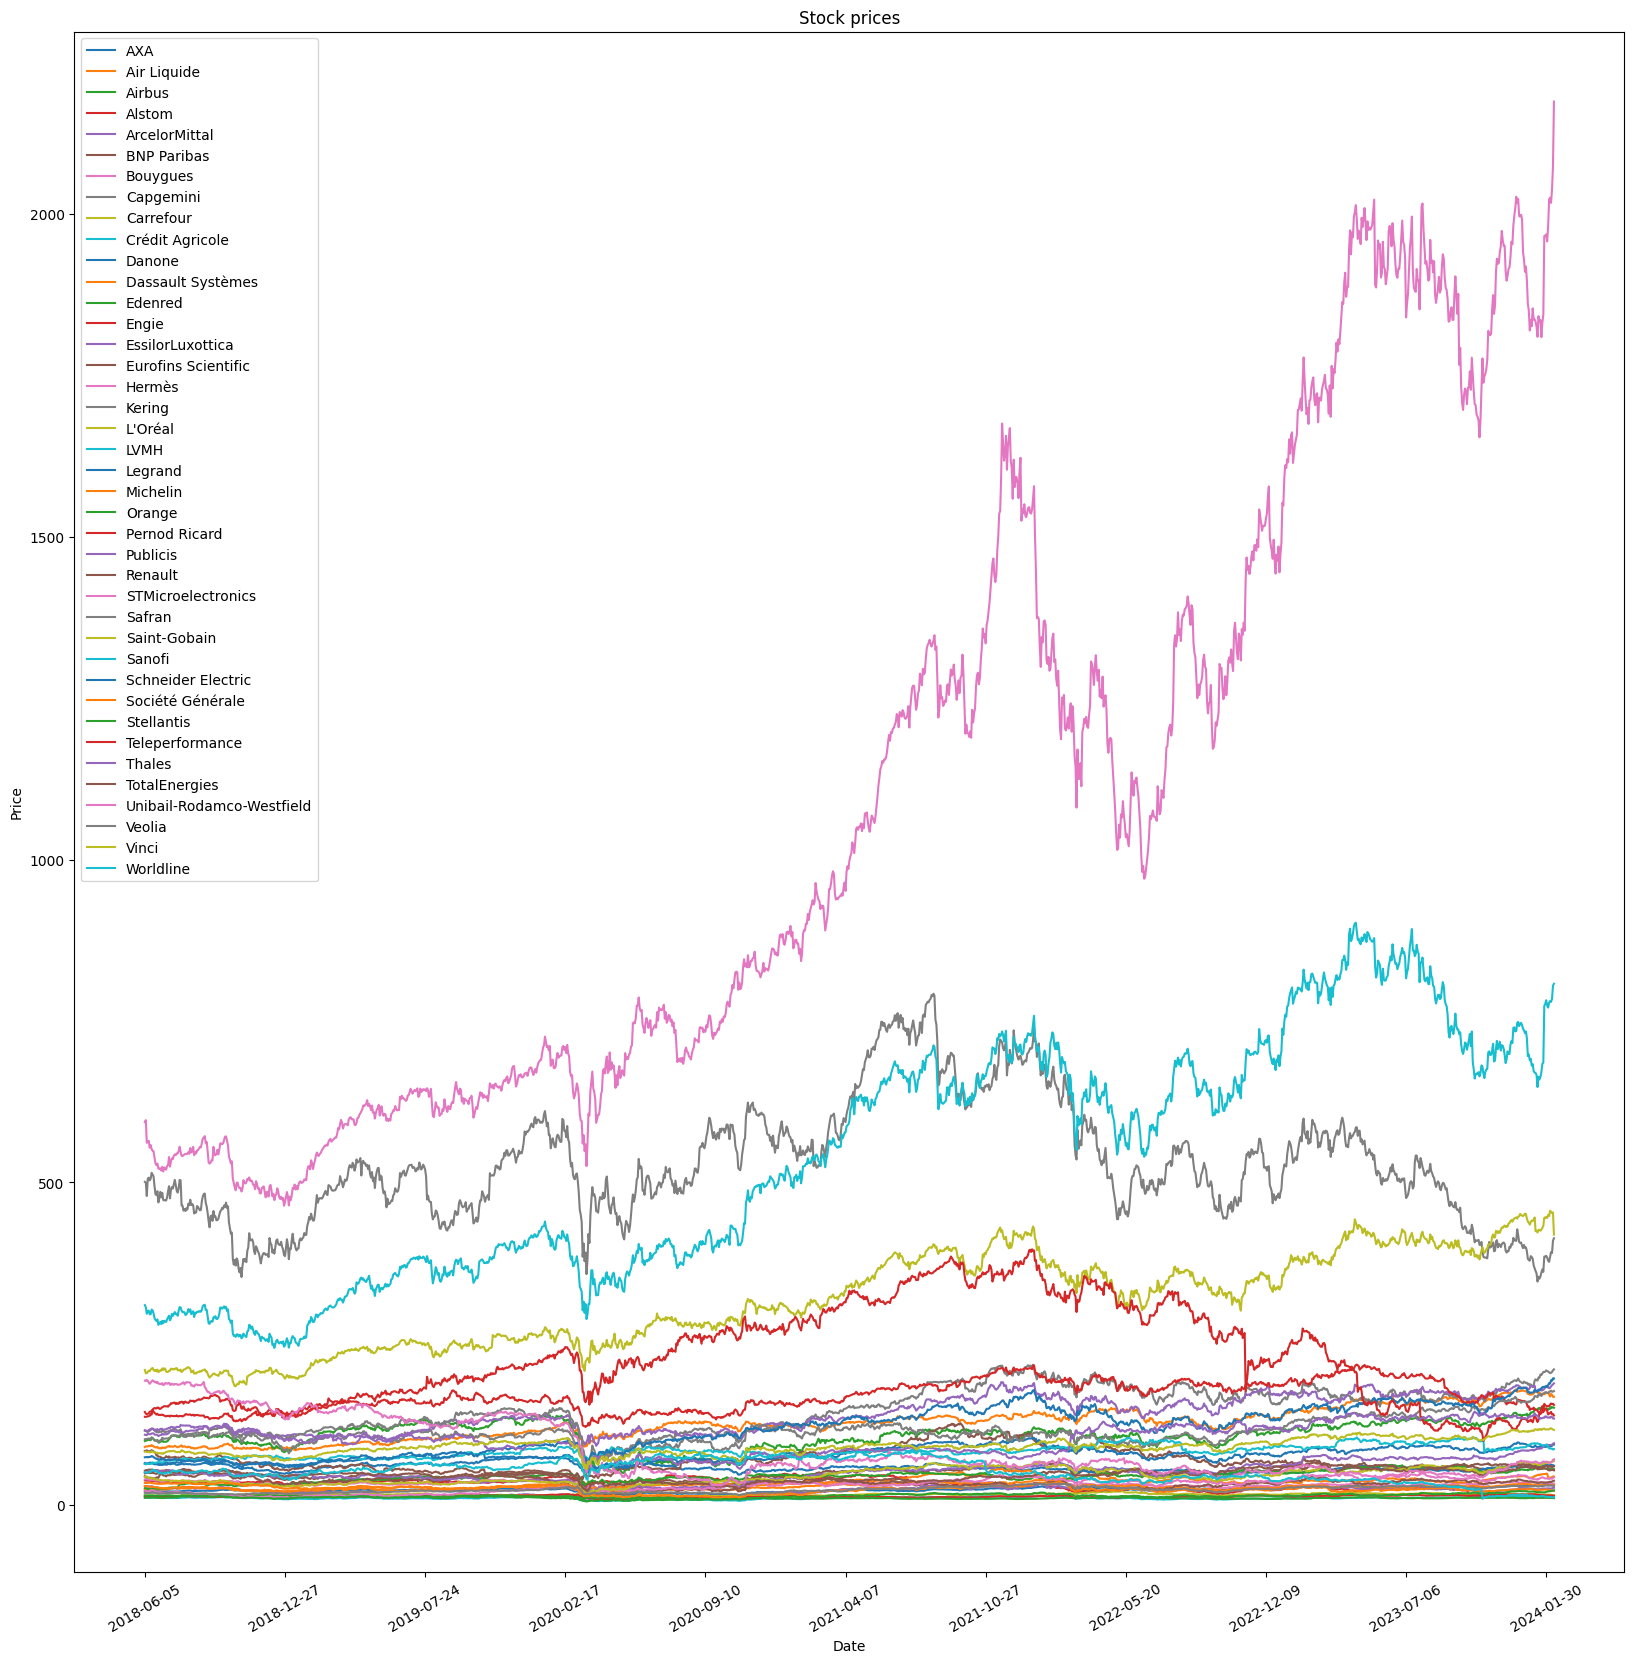

In [6]:
plt.figure(figsize=(20, 20))
for title in df.columns[1:]:
    plt.plot(np.array(df['date']), np.array(df[title]), label=title)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock prices')
step = len(price) //  10
dates_to_display = dates[::step]
plt.xticks(dates_to_display, rotation=30) 
plt.show()

# Returns Estimation

## Daily returns : 

In [7]:
date_init = '2019-01-01'
date_fin = '2019-12-31'

#####
#####

stocks = pd.read_csv('./stocks.csv')
stocks = stocks.loc[(stocks['date'] >= date_init) & (stocks['date'] <= date_fin)].reset_index(drop=True)

daily_returns = stocks.iloc[:, 1:].pct_change() +1
daily_returns = daily_returns.drop(0)
daily_returns.reset_index(drop=True, inplace=True)





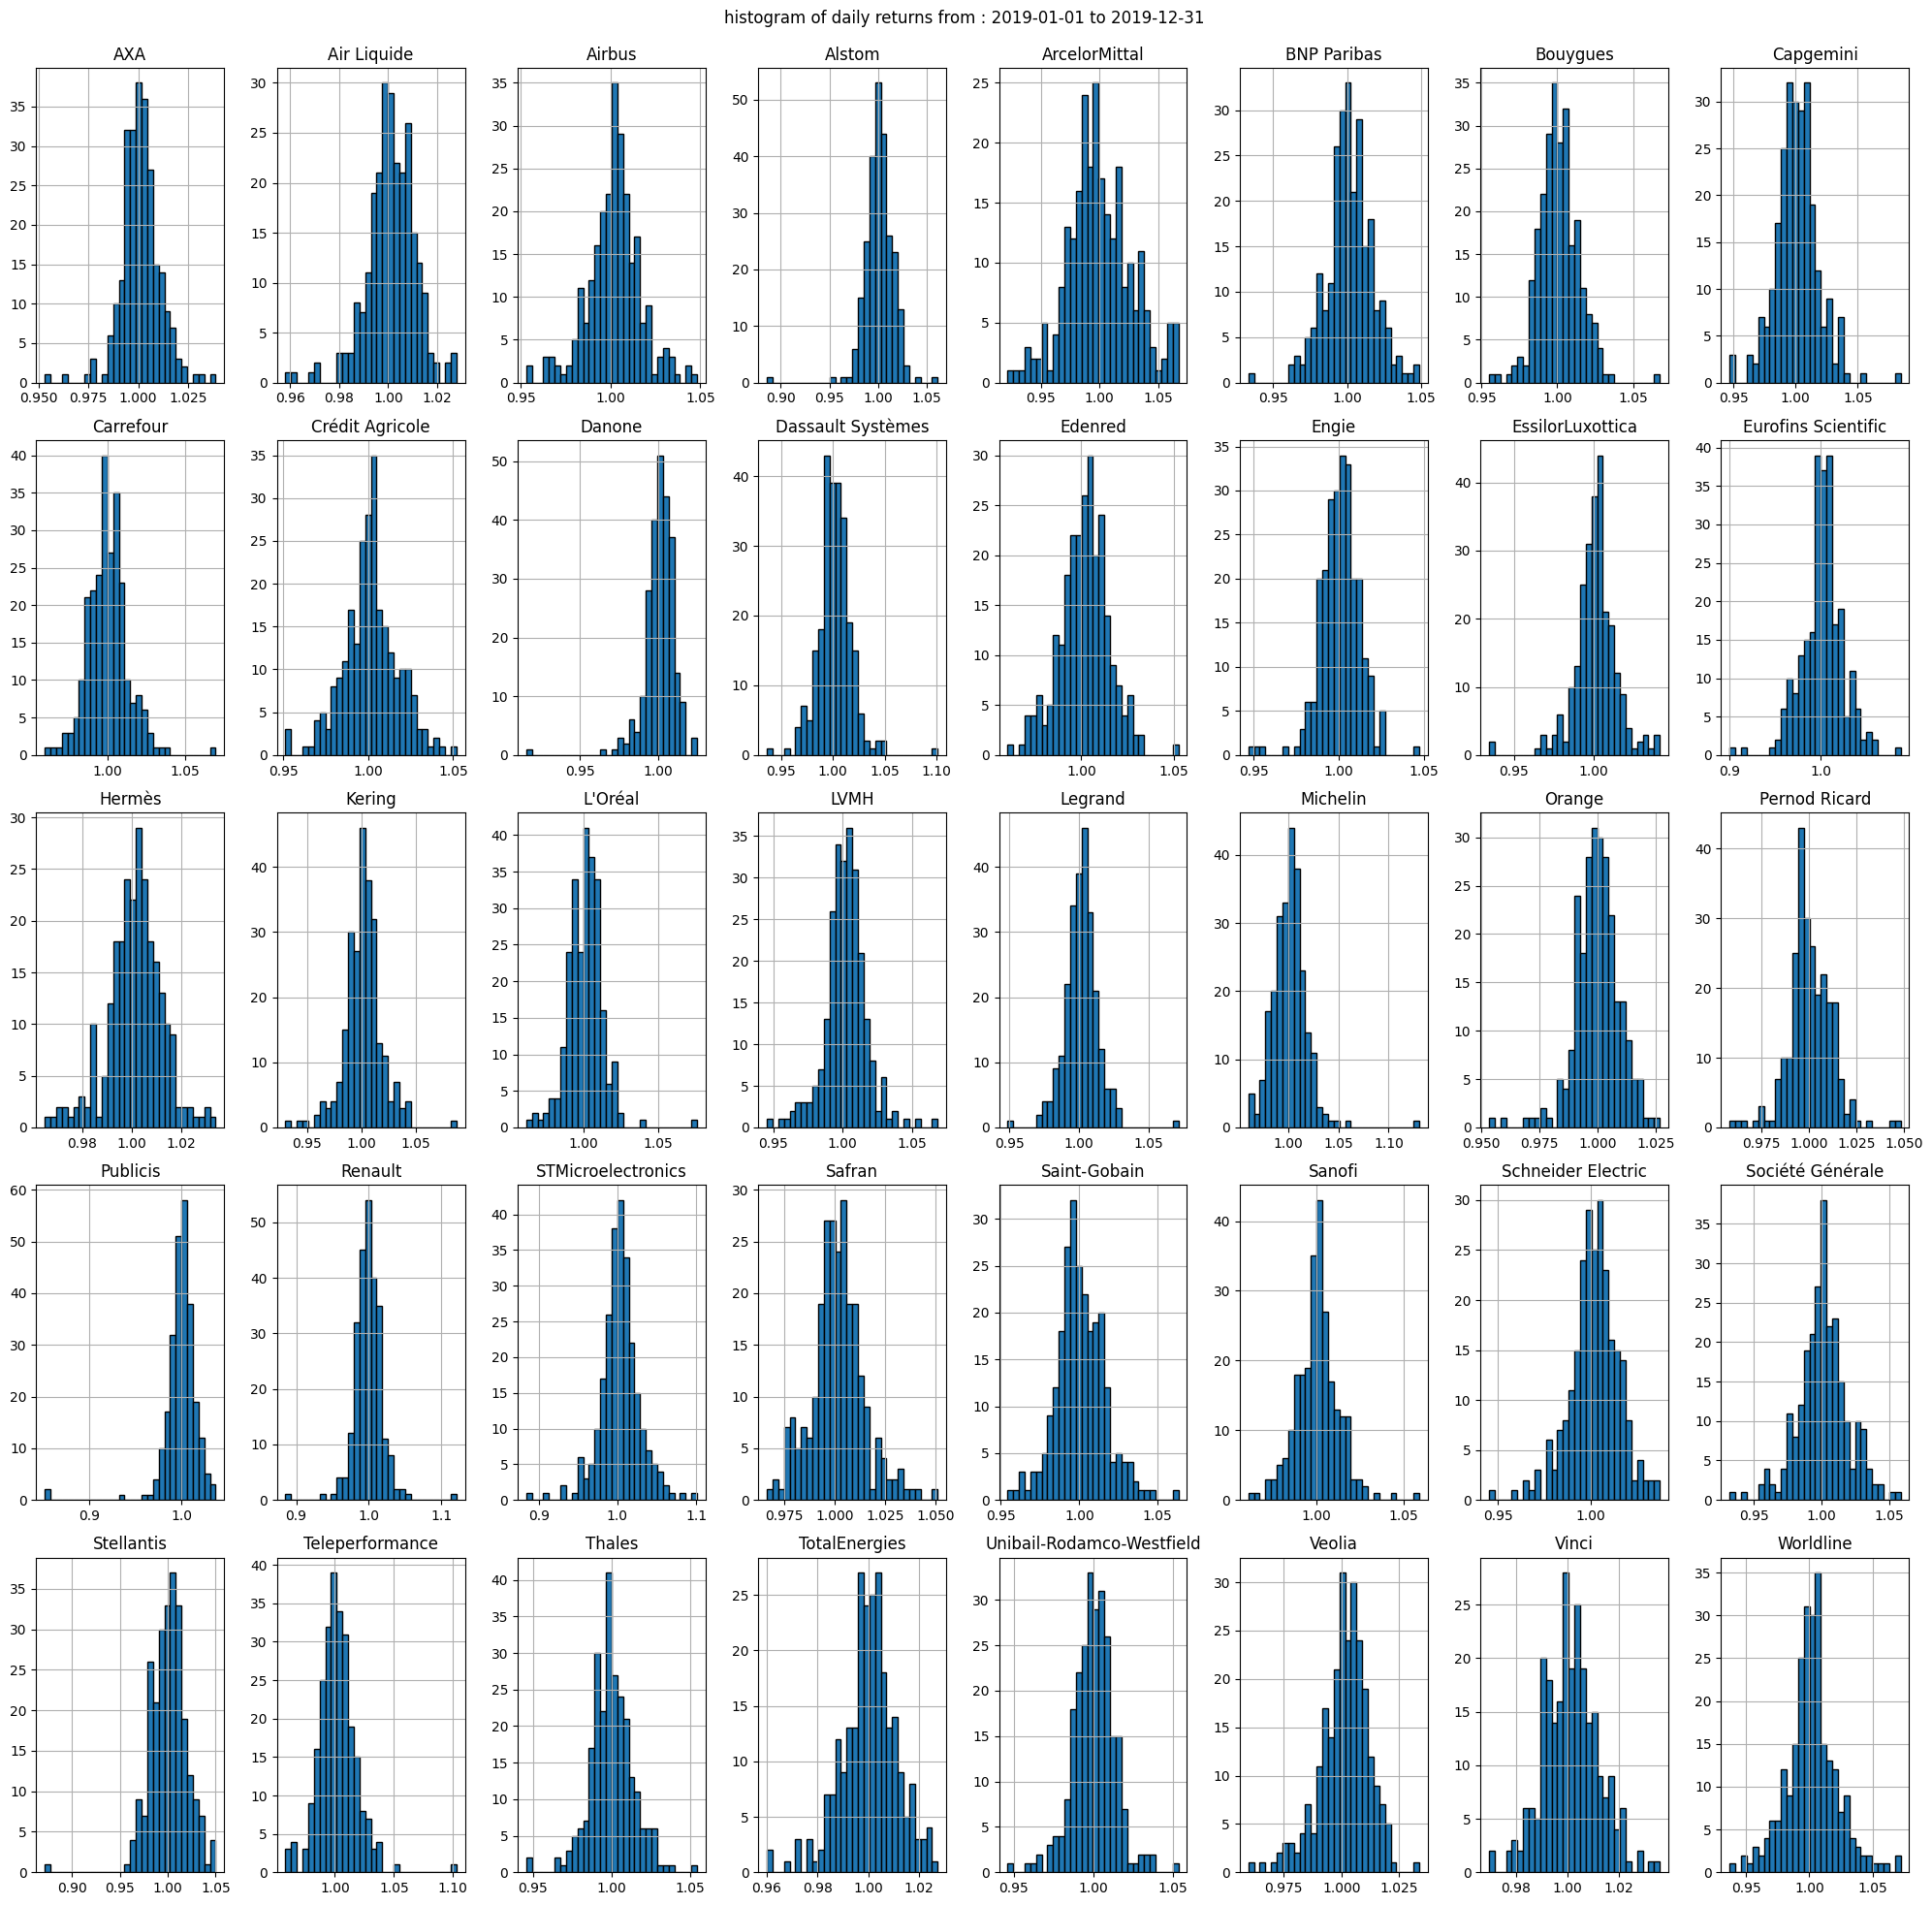

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 8, figsize=(20, 20))

for i, column in enumerate(daily_returns.columns):
    row = i // 8  
    col = i % 8   
    axs[row, col].hist(daily_returns[column].dropna(), bins=30, edgecolor='black')
    axs[row, col].set_title(f'{column}')
    axs[row, col].grid(True)

plt.tight_layout()

plt.suptitle('histogram of daily returns from : ' + date_init + ' to ' + date_fin)
plt.subplots_adjust(top=0.95)

plt.show()


In [9]:
mean_returns = daily_returns.mean()
var_returns = daily_returns.var()

stats_rendements = pd.DataFrame({'Mean': mean_returns, 'Variance': var_returns}).T

stats_rendements

,AXA,Air Liquide,Airbus,Alstom,ArcelorMittal,BNP Paribas,Bouygues,Capgemini,Carrefour,Crédit Agricole,...,Schneider Electric,Société Générale,Stellantis,Teleperformance,Thales,TotalEnergies,Unibail-Rodamco-Westfield,Veolia,Vinci,Worldline
Mean,1.001186,1.001109,1.001835,1.000812,0.999888,1.001311,1.000948,1.001158,1.000263,1.001418,...,1.001804,1.001020,1.000823,1.001905,0.999721,1.000318,1.000319,1.001185,1.001342,1.001848
Variance,0.000095,0.000100,0.000216,0.000222,0.000751,0.000248,0.000176,0.000297,0.000169,0.000255,...,0.000180,0.000335,0.000368,0.000260,0.000187,0.000120,0.000176,0.000110,0.000114,0.000413


## Monthly returns : 

In [10]:

date_init = '2020-12-31'
date_fin = '2023-12-31'

stocks = pd.read_csv('./stocks.csv')
stocks = stocks.loc[(stocks['date'] >= date_init) & (stocks['date'] <= date_fin)].reset_index(drop=True)

stocks['date'] = pd.to_datetime(stocks['date'])

stocks.set_index('date', inplace=True)

monthly_returns = stocks.iloc[:, 0:].resample('M').ffill().pct_change() + 1

monthly_returns.reset_index(drop=True, inplace=True)
monthly_returns = monthly_returns.drop(0)
monthly_returns.head()


C:\Users\user\AppData\Local\Temp\ipykernel_6072\1853984292.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = stocks.iloc[:, 0:].resample('M').ffill().pct_change() + 1


,AXA,Air Liquide,Airbus,Alstom,ArcelorMittal,BNP Paribas,Bouygues,Capgemini,Carrefour,Crédit Agricole,...,Schneider Electric,Société Générale,Stellantis,Teleperformance,Thales,TotalEnergies,Unibail-Rodamco-Westfield,Veolia,Vinci,Worldline
1,0.937884,1.005588,0.926710,0.962444,0.955614,0.922863,0.963447,0.942429,0.997149,0.908978,...,1.022401,0.906944,0.974473,0.995945,0.990387,0.988527,1.076185,1.102472,0.941249,0.885714
2,1.136612,0.923709,1.152764,0.921529,1.072941,1.238688,1.035163,1.114226,1.032523,1.238263,...,1.015709,1.330159,1.072692,1.084752,1.057428,1.099728,0.875108,1.013117,1.123531,1.053383
3,1.100240,1.117074,1.006569,1.028555,1.272342,1.052867,1.018772,1.089748,1.069228,1.062826,...,1.060236,1.086681,1.184138,1.060389,1.080061,1.036482,1.123644,0.978096,1.015342,0.968022
4,1.027966,1.005891,1.035219,1.068671,0.984572,1.029106,1.042410,1.050310,1.042732,1.042654,...,1.021267,1.060721,0.915650,1.033140,1.000708,0.925833,1.003658,1.211795,1.046245,1.142637
5,0.959830,0.992574,1.067240,1.012102,1.109072,1.046076,0.936588,1.001640,1.038187,1.008430,...,0.972786,1.107098,1.177144,0.979757,0.989148,1.029328,1.037761,0.970166,1.016630,0.958961


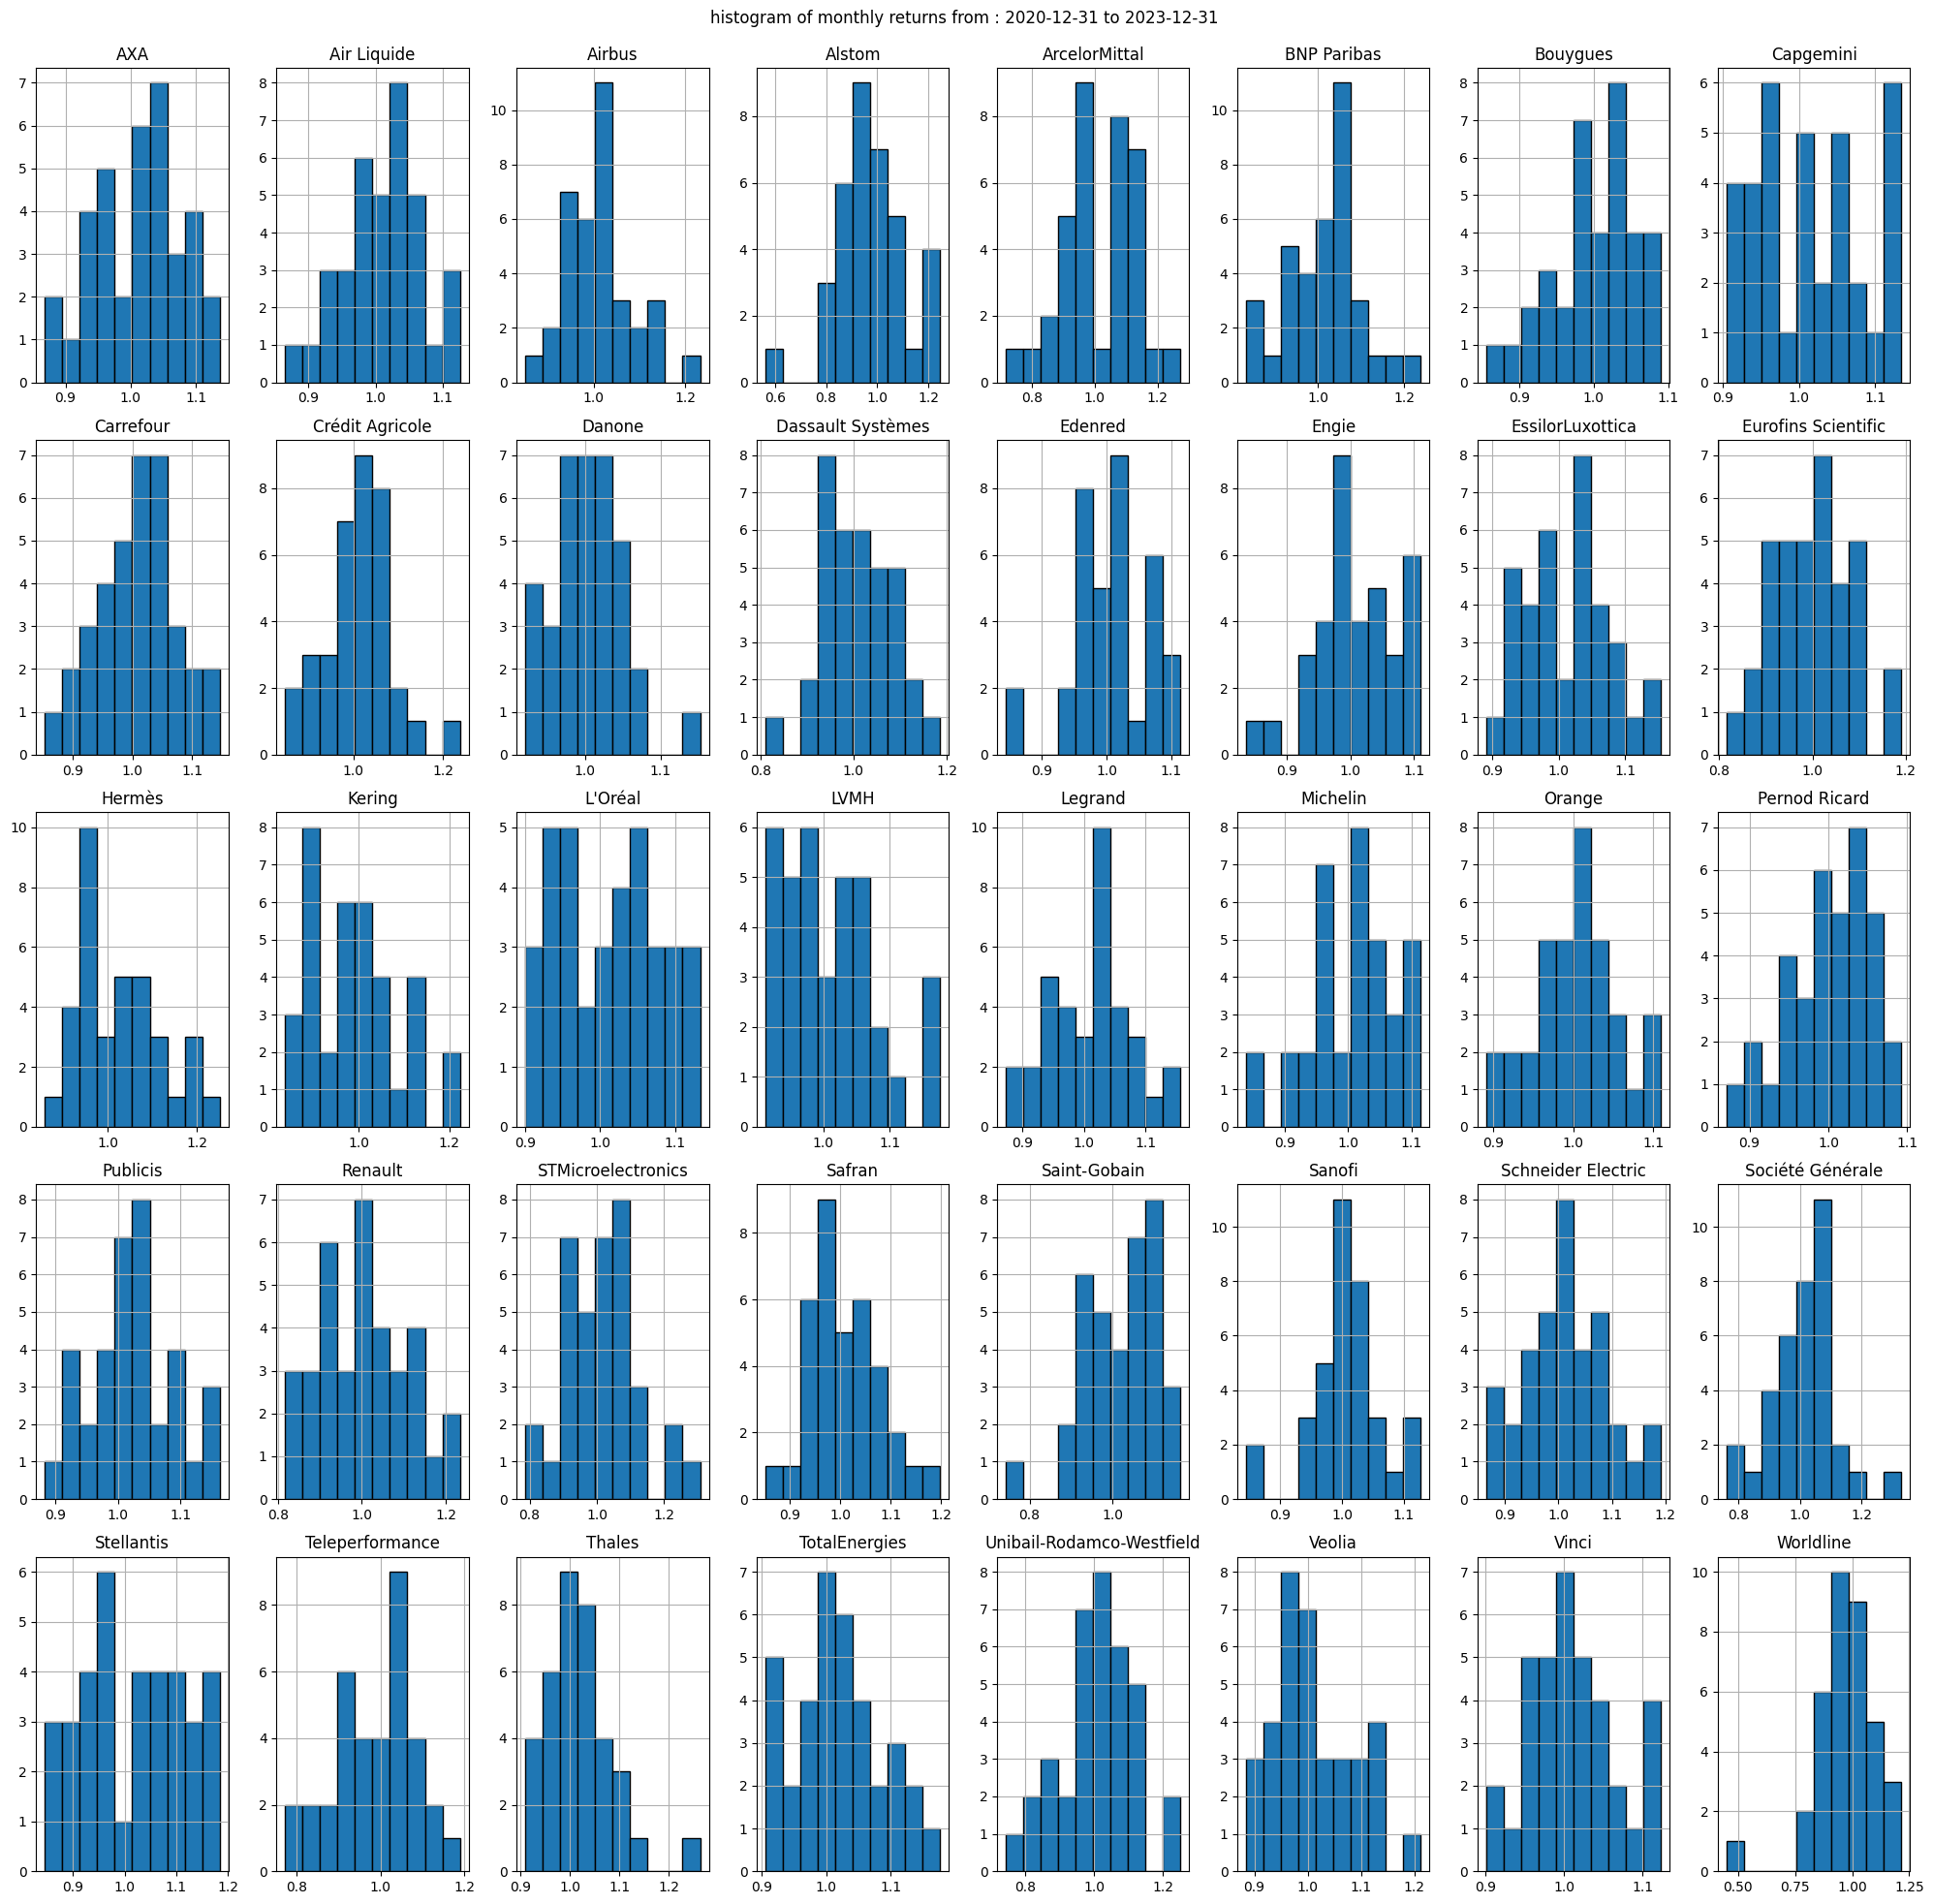

In [11]:
fig, axs = plt.subplots(5, 8, figsize=(20, 20))

for i, column in enumerate(monthly_returns.columns):
    row = i // 8  
    col = i % 8   
    axs[row, col].hist(monthly_returns[column].dropna(), bins=10, edgecolor='black')
    axs[row, col].set_title(f'{column}')
    axs[row, col].grid(True)

plt.tight_layout()

plt.suptitle('histogram of monthly returns from : ' + date_init + ' to ' + date_fin)
plt.subplots_adjust(top=0.95)

plt.show()


In [12]:
mean_returns = monthly_returns.mean()
var_returns = monthly_returns.var()

stats_rendements = pd.DataFrame({'Mean': mean_returns, 'Variance': var_returns}).T

stats_rendements

,AXA,Air Liquide,Airbus,Alstom,ArcelorMittal,BNP Paribas,Bouygues,Capgemini,Carrefour,Crédit Agricole,...,Schneider Electric,Société Générale,Stellantis,Teleperformance,Thales,TotalEnergies,Unibail-Rodamco-Westfield,Veolia,Vinci,Worldline
Mean,1.013634,1.011835,1.015114,0.973033,1.014769,1.014133,1.001912,1.013415,1.006792,1.010619,...,1.014945,1.015346,1.020094,0.985273,1.018330,1.017789,1.006862,1.013716,1.01086,0.967513
Variance,0.004309,0.003270,0.005816,0.017625,0.012495,0.007668,0.003068,0.004838,0.004438,0.005773,...,0.006118,0.011706,0.009749,0.010009,0.004518,0.004652,0.011909,0.005891,0.00319,0.018640


## Annual returns : 

In [13]:
date_init = '2018-05-05'
date_fin = '2023-12-31'

stocks = pd.read_csv('./stocks.csv')
stocks = stocks.loc[(stocks['date'] >= date_init) & (stocks['date'] <= date_fin)].reset_index(drop=True)

stocks['date'] = pd.to_datetime(stocks['date'])

stocks.set_index('date', inplace=True)

start_price_yearly = stocks.resample('Y').first()
end_price_yearly = stocks.resample('Y').last()
annual_returns = (end_price_yearly / start_price_yearly)

annual_returns.head()


C:\Users\user\AppData\Local\Temp\ipykernel_6072\3140022390.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  start_price_yearly = stocks.resample('Y').first()
C:\Users\user\AppData\Local\Temp\ipykernel_6072\3140022390.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  end_price_yearly = stocks.resample('Y').last()


,AXA,Air Liquide,Airbus,Alstom,ArcelorMittal,BNP Paribas,Bouygues,Capgemini,Carrefour,Crédit Agricole,...,Schneider Electric,Société Générale,Stellantis,Teleperformance,Thales,TotalEnergies,Unibail-Rodamco-Westfield,Veolia,Vinci,Worldline
date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,0.867832,0.998618,0.848252,0.856077,0.632497,0.743129,0.793016,0.756098,0.997278,0.792154,...,0.809214,0.746047,0.920747,1.022711,0.938362,0.915889,0.703559,0.926469,0.848099,0.838133
2019-12-31,1.335212,1.308384,1.550196,1.194299,0.883829,1.351669,1.244415,1.292428,1.046424,1.387778,...,1.545086,1.241693,1.175517,1.569675,0.909735,1.067623,1.060549,1.332013,1.385768,1.517299
2020-12-31,0.766379,1.059584,0.672409,1.180536,1.192672,0.804498,0.871536,1.141828,0.951961,0.782717,...,1.271223,0.537735,1.028970,1.241080,0.805896,0.722605,0.456719,0.836172,0.839464,1.231128
2021-12-31,1.347104,1.123641,1.249972,0.651707,1.427666,1.412927,0.925632,1.679003,1.111456,1.306339,...,1.416509,1.808466,1.346086,1.398003,0.994945,1.290444,1.006863,1.662116,1.123187,0.609274
2022-12-31,0.983208,0.942651,0.955915,0.719420,0.858965,0.870098,0.892709,0.730445,0.970223,0.771785,...,0.746374,0.770974,0.766432,0.562374,1.575125,1.303623,0.774363,0.736196,1.006582,0.730892


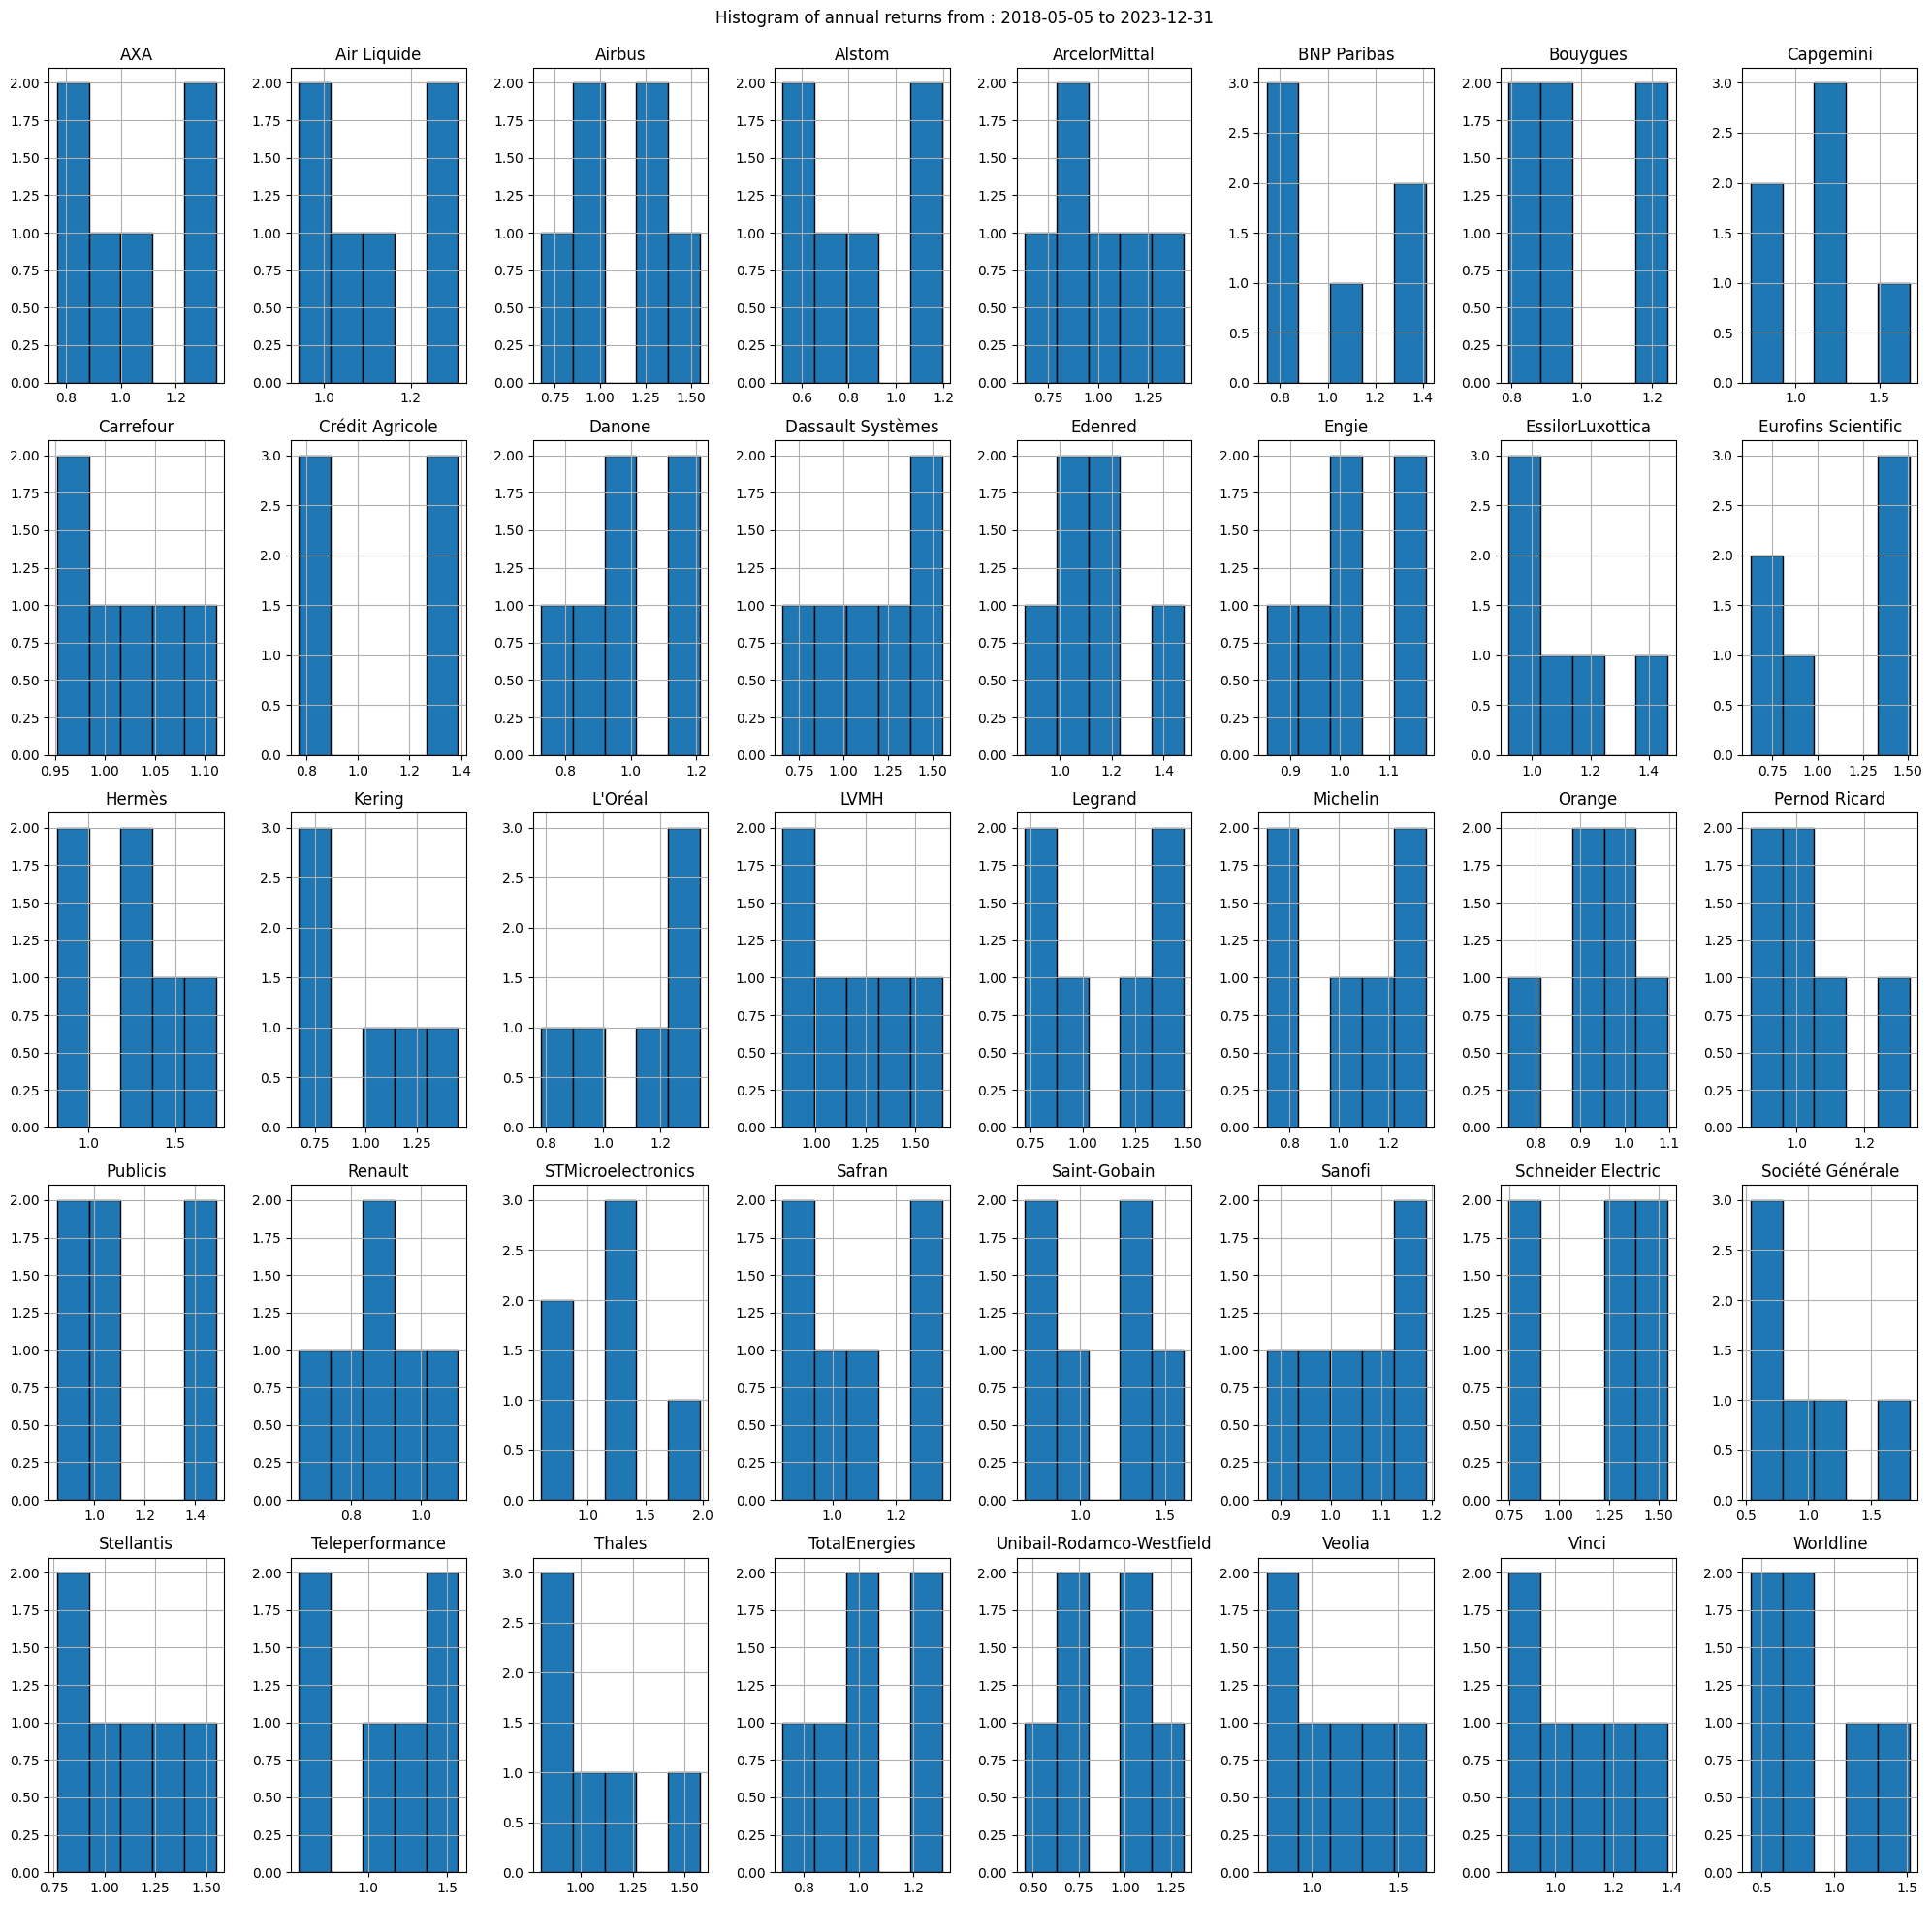

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 8, figsize=(20, 20))

for i, column in enumerate(annual_returns.columns):
    row = i // 8  
    col = i % 8   
    axs[row, col].hist(annual_returns[column].dropna(), bins=5, edgecolor='black')
    axs[row, col].set_title(f'{column}')
    axs[row, col].grid(True)

plt.tight_layout()

plt.suptitle('Histogram of annual returns from : ' + date_init + ' to ' + date_fin)
plt.subplots_adjust(top=0.95)

plt.show()


In [15]:
mean_returns = annual_returns.mean()
var_returns = annual_returns.var()

stats_rendements = pd.DataFrame({'Mean': mean_returns, 'Variance': var_returns}).T

stats_rendements

,AXA,Air Liquide,Airbus,Alstom,ArcelorMittal,BNP Paribas,Bouygues,Capgemini,Carrefour,Crédit Agricole,...,Schneider Electric,Société Générale,Stellantis,Teleperformance,Thales,TotalEnergies,Unibail-Rodamco-Westfield,Veolia,Vinci,Worldline
Mean,1.068866,1.122912,1.084065,0.853833,1.001475,1.053629,0.987347,1.131650,1.021515,1.054629,...,1.192975,1.016383,1.131215,1.064288,1.056719,1.054418,0.886866,1.106890,1.066762,0.891346
Variance,0.057919,0.023872,0.101382,0.078477,0.077726,0.083490,0.034777,0.126194,0.003536,0.090235,...,0.111588,0.208220,0.082189,0.174969,0.074926,0.049613,0.092542,0.120786,0.045027,0.167262


# Estimations 

We try with annual returns for the Markowitz Optimization Problem : 

In [16]:
annual_returns.head()

,AXA,Air Liquide,Airbus,Alstom,ArcelorMittal,BNP Paribas,Bouygues,Capgemini,Carrefour,Crédit Agricole,...,Schneider Electric,Société Générale,Stellantis,Teleperformance,Thales,TotalEnergies,Unibail-Rodamco-Westfield,Veolia,Vinci,Worldline
date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,0.867832,0.998618,0.848252,0.856077,0.632497,0.743129,0.793016,0.756098,0.997278,0.792154,...,0.809214,0.746047,0.920747,1.022711,0.938362,0.915889,0.703559,0.926469,0.848099,0.838133
2019-12-31,1.335212,1.308384,1.550196,1.194299,0.883829,1.351669,1.244415,1.292428,1.046424,1.387778,...,1.545086,1.241693,1.175517,1.569675,0.909735,1.067623,1.060549,1.332013,1.385768,1.517299
2020-12-31,0.766379,1.059584,0.672409,1.180536,1.192672,0.804498,0.871536,1.141828,0.951961,0.782717,...,1.271223,0.537735,1.028970,1.241080,0.805896,0.722605,0.456719,0.836172,0.839464,1.231128
2021-12-31,1.347104,1.123641,1.249972,0.651707,1.427666,1.412927,0.925632,1.679003,1.111456,1.306339,...,1.416509,1.808466,1.346086,1.398003,0.994945,1.290444,1.006863,1.662116,1.123187,0.609274
2022-12-31,0.983208,0.942651,0.955915,0.719420,0.858965,0.870098,0.892709,0.730445,0.970223,0.771785,...,0.746374,0.770974,0.766432,0.562374,1.575125,1.303623,0.774363,0.736196,1.006582,0.730892


In [17]:
means_estimators = annual_returns.mean()
covariance_matrix = annual_returns.cov()

covariance_matrix = np.identity(40)

In [18]:
mu_test = means_estimators
omega_test = covariance_matrix

In [19]:
r = 0.03 # risk free rate 
v = 100 # initial wealth

sigma = 1 # risk aversion coefficient

price_2023=  stocks.loc['2023-02-01']
diagp0 = np.diag(price_2023)

prices_2024 =stocks.loc['2023-12-29']
diagp1 = np.diag(prices_2024)

# Markowitz with riskless asset Solver Implementation :

We use the formulas that we found by solving the Lagrangian problem : 

In [20]:
def solve_markowitz(mu, sigma, omega, r, v, diagp0):

    n = len(mu)
    mu = np.array(mu)
    omega = np.array(omega)
    e = np.ones(n)

    mu_tilde = mu - (1+r) * e
    lamda = 1/sigma * np.sqrt(mu_tilde.T @ np.linalg.inv(omega) @ mu_tilde)

    a0 = v - 1/lamda * mu_tilde.T @ np.linalg.inv(omega) @ e
    a = 1/lamda * np.linalg.inv(diagp0) @ np.linalg.inv(omega) @ mu_tilde

    return a0, a, lamda

a0, a, lamda = solve_markowitz(mu_test, sigma, omega_test, r, v, diagp0)

In [21]:
def ptf_markowitz(mu, sigma, omega, r, v, diagp0, diagp1):

    a0, a, lamda = solve_markowitz(mu, sigma, omega, r, v, diagp0)
    
    ptf0 = a0 + a.T @ diagp0.diagonal()
    ptf1 = a0 + a.T @ diagp1.diagonal()

    return 100*(ptf1-ptf0)/ptf0, ptf1, ptf0

For an efficient portfolio (i.e that solves markowitz problem), we should have :

$$\mathbb{E}(V_1) = a_0(1+r) + a^Tdiag(p_0)\mu = v(1+r) - \frac{1}{\lambda}\tilde{\mu}^T\Omega{-1} e + \frac{1}{\lambda} \tilde{\mu}^T \Omega^{-1} \mu$$

$$= v(1+r) + \frac{1}{\lambda} \tilde{\mu}^T \Omega^{-1} \tilde{\mu}$$

And since $\sqrt{\mathbb{V}ar (V_1)} = \sigma = \frac{(\tilde{\mu}^T \Omega^{-1} \mu)^{\frac{1}{2}}}{\lambda}$ :

$$\mathbb{E}(V_1) = v(1+r) + \sigma (\tilde{\mu}^T \Omega^{-1} \mu)^{\frac{-1}{2}}$$

Hence the relationship $\mathbb{E}(V_1) = f(\sigma)$ should be linear for optimal markowitz portfolios ! 

Let's check this out : 

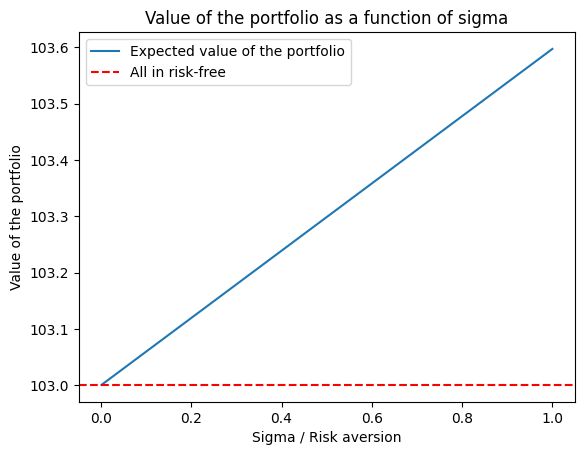

In [22]:
#sigma_list = np.linspace(10**(-15), 10**(-8), 100)
sigma_list = np.linspace(0.001, 1, 100)


esp_V_list = []
profit = []


for sigma in sigma_list:
    a0, a, lamda = solve_markowitz(mu_test, sigma, omega_test, r, v, diagp0)

    esp_V = a0*(1+r) + a.T @ diagp0 @ mu_test
    esp_V_list.append(esp_V)

    ptf_profit, ptf1, ptf0 = ptf_markowitz(mu_test, sigma, omega_test, r, v, diagp0, diagp1)

non_risk = v*(1+r)

plt.plot(sigma_list, esp_V_list, label='Expected value of the portfolio')   
plt.axhline(y=non_risk, color='r', label='All in risk-free', linestyle='--')
plt.xlabel('Sigma / Risk aversion')
plt.ylabel('Value of the portfolio')
plt.title('Value of the portfolio as a function of sigma')
plt.legend()
plt.show()

We indeed find a straight line. Moreover we find that when $\sigma=0$ the best expected portfolio is the one when the entire intial capital $v$ is invested at rate $r$ during the period.

# Markowitz without riskless asset Solver Implementation :

If we assume that there is no riskless asset on the market and that we are forced to invest the total amount $v$ in the risky assets, the problem is a bit different :  

We have :


$$V_0 = a^T p_0 = v$$

and at time $t = 1$, the portfolio's value is:

$$V_1 = a^T p_1 = \sum_{i=1}^{n} a_i p_{i,0} y_i = w_a^TY$$


We aim to maximize the expected value of the portfolio at time $t = 1$, $\mathbb{E}[V_1]$, subject to a constraint on the portfolio's variance $\mathbb{V}[V_1] = \sigma^2$. This leads to the optimization problem:

$$\max_{w_a} \mathbb{E}[V_1] = \max_{w_a} w_a^T\mu$$

subject to the constraints:

$$w_a^T \Omega w_a = \sigma^2, \quad \text{and} \quad w_a^Te = v$$


Define the Lagrangian :




$$\mathcal{L} (w_a, \lambda, \alpha) = w_a^T\tilde{\mu} - \frac{\lambda}{2}(w_a^T\Omega w_a - \sigma^2) - \alpha (w_a^T.e-v)$$

$$\mathcal{L} (w_a, \lambda, \alpha) = \sum_{i=i}^N w_{a,i}\tilde{\mu_i} - \frac{\lambda}{2} \left( \sum_{i=1}^n w_{a,i}^2 \Omega_{i,i} + \sum_{i\not= j} w_{a,i}w_{a,j}\Omega_{i,j}-\sigma^2\right) - \alpha \left( \sum_{i=i}^N (w_{a,i}) - v\right)$$

The first order conditions are the following : 

$$\forall i =1,...,N : \quad \frac{\partial\mathcal{L}}{\partial w_{a,i}} = \tilde{\mu_i} - \lambda \left( w_{a,i} \Omega_{i,i} + \sum_{i\not= j} w_{a,j}\Omega_{i,j} \right) -\alpha w_{a,i}= 0 $$

$$\frac{\partial\mathcal{L}}{\partial \lambda} = -\frac{1}{2} \left( w_a^T \Omega w_a- \sigma^2 \right) = 0 $$

$$\frac{\partial\mathcal{L}}{\partial \alpha} = w_a^Te - v = 0 $$

Hence :

$$\tilde{\mu} = \lambda \Omega w_a + \alpha e \quad \text{and} \quad w_a^T\Omega w_a = \sigma^2 \quad \text{and} \quad w_a^Te =v$$

We first isolate $w_a$ and then reinject it to find a quadratic equation over $\alpha$ :

$$\fbox{$w_a = \frac{1}{\lambda}\Omega^{-1}\mu - \frac{\alpha}{\lambda}\Omega^{-1}e$}$$

Then:

$$v = \frac{1}{\lambda}\mu^T\Omega^{-1}e - \frac{\alpha}{\lambda}e^T\Omega^{-1}e$$ 
and

$$ \sigma^2 = \left ( \frac{1}{\lambda}\mu^T\Omega^{-1} - \frac{\alpha}{\lambda}e^T\Omega^{-1} \right) \Omega \left ( \frac{1}{\lambda}\Omega^{-1}\mu - \frac{\alpha}{\lambda} \Omega^{-1}e \right)$$

$$\fbox {$\lambda \sigma^2 = \left(\mu^T-\alpha e^T\right) \left(\Omega^{-1}\mu - \alpha \Omega^{-1}e \right)$} $$

$$ \fbox{$ \lambda v = \mu^T\Omega^{-1}e - \alpha e^T\Omega^{-1}e$}$$ 

Injecting $\lambda$ from the second equation in the first and then by isolating $\alpha$ leads to : 

$$\fbox{$\alpha^2 \left(e^T\Omega^{-1}e -(\frac{\sigma}{v})^2 (e^T\Omega^{-1} e)^2\right) - \alpha \left( \mu^T\Omega^{-1}e + e^T\Omega^{-1}\mu - 2 (\frac{\sigma}{v})^2(\mu^T\Omega^{-1}e)(e^T\Omega^{-1}e)        \right) + \mu^T\Omega^{-1}\mu - (\frac{\sigma}{v}^2) (\mu^T \Omega^{-1} e)^2$}$$

Since it is a quadratic equation, we will have two solutions for $w_a$. However only one portfolio will be eligible .

In [23]:
def solve_markowitz_no_riskless(mu, sigma, omega, v, diagp0):
    n = len(mu)
    mu = np.array(mu)
    sigma
    omega = np.array(omega)
    e = np.ones(n)

    """a2 = e.T @ np.linalg.inv(omega) @ e
    a1 = mu.T @ np.linalg.inv(omega) @ e - e.T @ np.linalg.inv(omega) @ mu + sigma**2/v * e.T @ np.linalg.inv(omega) @ e
    a0 = mu.T @ np.linalg.inv(omega) @ mu - sigma**2/v * mu.T @ np.linalg.inv(omega) @ e"""

    a0 = mu.T @ np.linalg.inv(omega) @ mu - sigma**2/v**2 * (mu.T @ np.linalg.inv(omega) @ e)**2
    a1 = -mu.T @ np.linalg.inv(omega) @ e - e.T @ np.linalg.inv(omega) @ mu + 2*sigma**2/v**2 * mu.T @ np.linalg.inv(omega) @ e * e.T @ np.linalg.inv(omega) @ e
    a2 = e.T @ np.linalg.inv(omega) @ e - sigma**2/v**2 * (e.T @ np.linalg.inv(omega) @ e)**2

    delta = a1**2 - 4*a0*a2
    #print(delta)
    alpha = (-a1 - np.sqrt(delta))/(2*a2)
    beta = (-a1 + np.sqrt(delta))/(2*a2)

    lamda_1 = 1/v * (mu.T @ np.linalg.inv(omega) @ e - alpha * e.T @ np.linalg.inv(omega) @ e)
    lamda_2 = 1/v * (mu.T @ np.linalg.inv(omega) @ e - beta * e.T @ np.linalg.inv(omega) @ e)

    wa = 1/lamda_1 * np.linalg.inv(omega) @ mu - alpha/lamda_1 * np.linalg.inv(omega) @ e	
    wb = 1/lamda_2 * np.linalg.inv(omega) @ mu - beta/lamda_2 * np.linalg.inv(omega) @ e

    #print(wa.T @ e)
    
    aa = np.linalg.inv(diagp0) @ wa
    ab = np.linalg.inv(diagp0) @ wb

    return aa, ab

solve_markowitz_no_riskless(mu_test, 15.8113884, omega_test, v, diagp0)
print('')

On the contrary to the first case, when there is no risk free asset on the market, the best expectancy of $V_1$ in function of $\sigma$ is a semi-parabol

Also, there is no optimal composition if the risk adversed parameter $\sigma$ is to small. Indeed, in that case, this mean that the intrisec risk associated to the basket of risky asset is not null. (Which is normal because there is no risk free asset anymore)

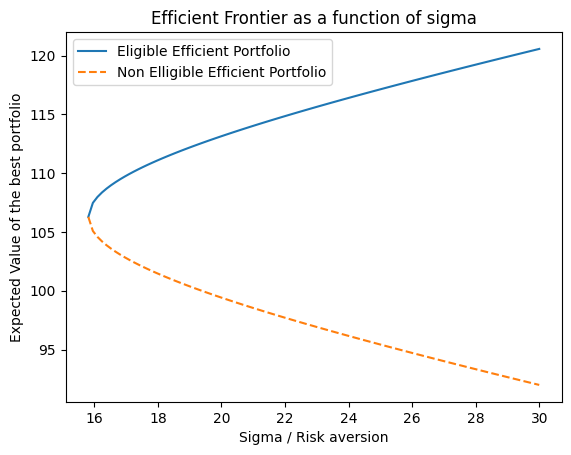

In [24]:
sigma_list = np.linspace(15.8113884, 30, 100)

esp_V_list_a = []
esp_V_list_b = []

for sigma in sigma_list:
    aa, bb = solve_markowitz_no_riskless(mu_test, sigma, omega_test, v, diagp0)
    esp_V_a = aa.T @ diagp0 @ mu_test
    esp_V_b = bb.T @ diagp0 @ mu_test

    #print(aa.T @ diagp0 @ np.ones(len(mu_test)))

    esp_V_list_a.append(esp_V_a)
    esp_V_list_b.append(esp_V_b)
    
plt.plot(sigma_list, esp_V_list_b, label='Eligible Efficient Portfolio')
plt.plot(sigma_list, esp_V_list_a, linestyle='--', label='Non Elligible Efficient Portfolio')
plt.legend()
plt.xlabel('Sigma / Risk aversion')
plt.ylabel('Expected Value of the best portfolio')
plt.title('Efficient Frontier as a function of sigma')
plt.show()


We indeed find a semi-parabol, and we also find that if the $\sigma$ is too small, (i.e the investor want a very small risk), there is no solution to the Markowitz Portofolio Optimization Problem because the intrisic risks of the risky assets is not null. (There is no risk less asset that can reduce the risk)

When we use smooth values for $\mu$ and $\Omega$, the numerical implementation works.

However, if we use the empiricall covariance matrix, $\Omega^{-1}$ tends to have values of order 10**16 which makes the numerical implementation not stable at all. 

Another estimator should maybe try to make Markowitz Portoflio Optimization work on real data.

But all the theorical computations are indeed verified when the values are smooth.